In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [265]:
df = pd.read_csv("dataset.csv")
print(df.head())
print(df.shape)


   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  
(1000, 10)


In [266]:
print(df.isnull().sum())
df.dropna(inplace=True)


Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64


In [267]:
df.replace({"gender": {"Male": 1, "Female": 0}}, inplace=True)


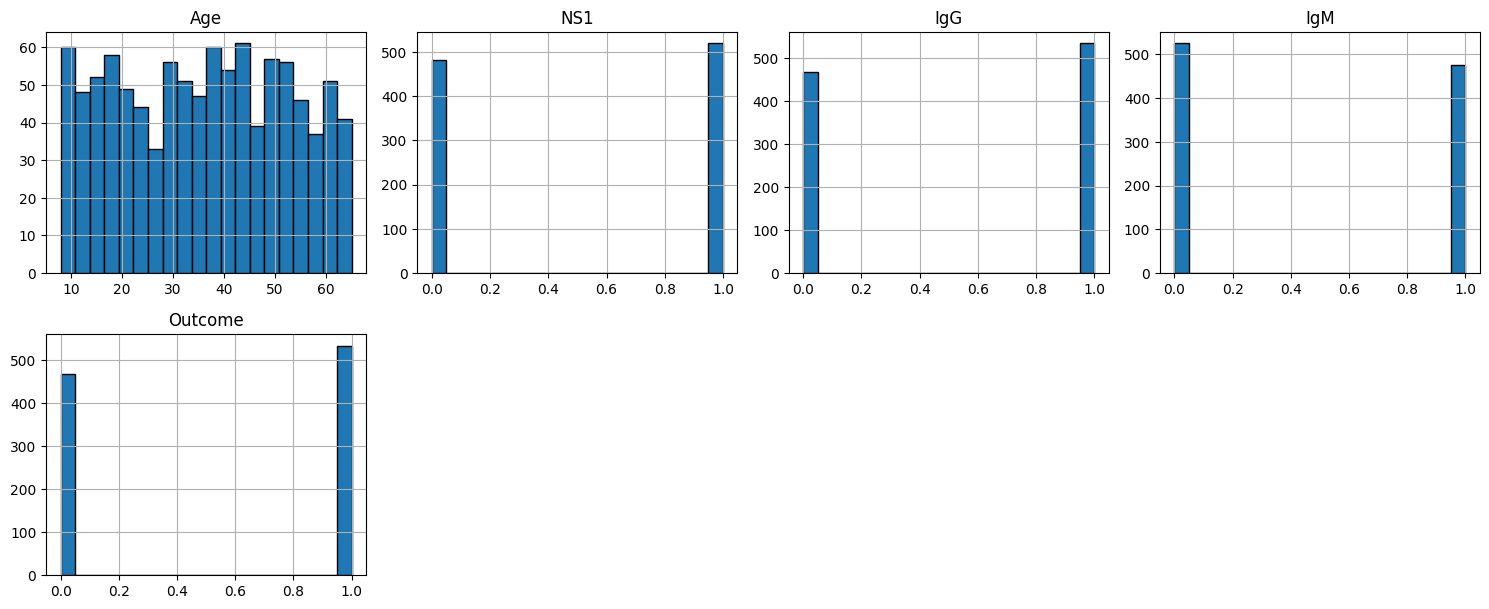

In [268]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,4,i)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


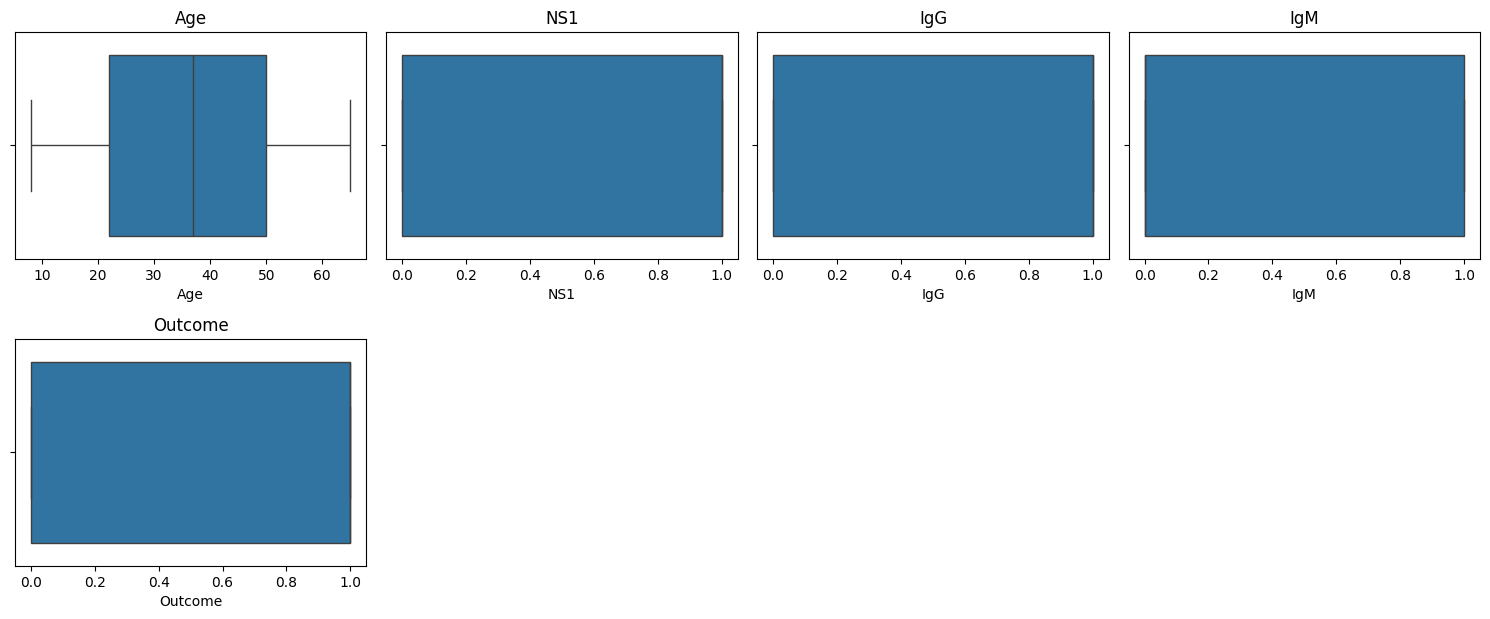

In [269]:
plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


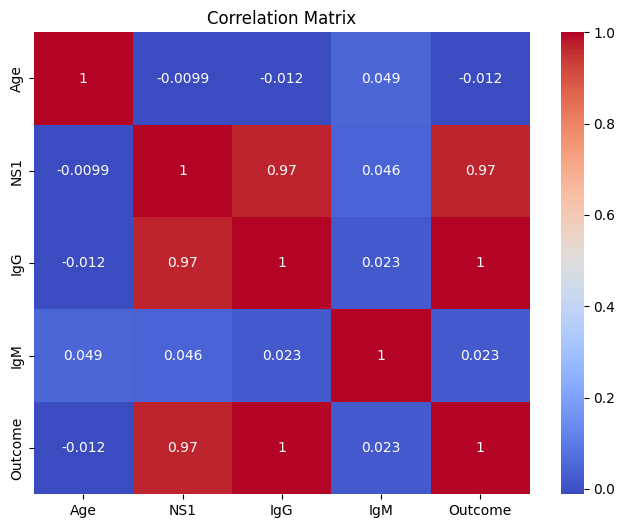

In [270]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [271]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [272]:
print(X)

     Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District
0    Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka
1      Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka
2    Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka
3    Female   63    1    1    0   Motijheel    Developed     Other    Dhaka
4      Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka
..      ...  ...  ...  ...  ...         ...          ...       ...      ...
995  Female   16    1    1    0  New Market    Developed  Building    Dhaka
996    Male   41    1    1    0      Paltan  Undeveloped     Other    Dhaka
997    Male   45    0    0    1   Motijheel    Developed  Building    Dhaka
998  Female   19    1    1    1      Paltan  Undeveloped  Building    Dhaka
999  Female   28    0    0    1      Adabor    Developed  Building    Dhaka

[1000 rows x 9 columns]


In [273]:
y

,Outcome
0,0
1,0
2,0
3,1
4,0
...,...
995,1
996,1
997,0
998,1


In [274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd



# Defining Features and Target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Specific features to encode (matching your request to dataset columns)
categorical_features = ['Area', 'AreaType', 'HouseType', 'District', 'Gender']

# Split data (Best practice: split before encoding)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize ColumnTransformer
# remainder='passthrough' ensures Age, NS1, IgG, and IgM are kept in the final data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and Transform
X_train_encoded = preprocessor.fit_transform(X_train_raw)
X_test_encoded = preprocessor.transform(X_test_raw)

# Reconstruct into a DataFrame with proper column names
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_names = [col for col in X.columns if col not in categorical_features]
all_feature_names = list(cat_names) + num_names

xtrain = pd.DataFrame(X_train_encoded, columns=all_feature_names)
xtest = pd.DataFrame(X_test_encoded, columns=all_feature_names)

In [275]:
xtrain

,Area_Badda,Area_Banasree,Area_Bangshal,Area_Biman Bandar,Area_Bosila,Area_Cantonment,Area_Chawkbazar,Area_Demra,Area_Dhanmondi,Area_Gendaria,...,Area_Sutrapur,Area_Tejgaon,AreaType_Undeveloped,HouseType_Other,HouseType_Tinshed,Gender_Male,Age,NS1,IgG,IgM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,36.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,29.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,52.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,45.0,1.0,1.0,1.0
796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,38.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,54.0,1.0,1.0,1.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0


In [276]:
xtrain.shape

(800, 43)

In [277]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [278]:
svm_model = SVC(kernel='linear')
svm_model.fit(xtrain, y_train)
svm_pred = svm_model.predict(xtest)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 1.0


In [279]:
svm_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1])

In [280]:
ytest

,Outcome
521,1
737,1
740,0
660,0
411,0
...,...
408,0
332,1
208,1
613,1


In [281]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, y_train)
knn_pred = knn.predict(xtest)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.975


In [282]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, y_train)
dt_pred = dt.predict(xtest)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 1.0


In [283]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)

print("Random Forest Accuracy:", accuracy_score(ytest, rf_pred))


Random Forest Accuracy: 1.0


In [284]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)

print("Logistic Regression Accuracy:", accuracy_score(ytest, lr_pred))


Logistic Regression Accuracy: 1.0


In [285]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
gb_pred = gb.predict(xtest)

print("Gradient Boosting Accuracy:", accuracy_score(ytest, gb_pred))


Gradient Boosting Accuracy: 1.0


In [286]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
nb_pred = nb.predict(xtest)

print("Naive Bayes Accuracy:", accuracy_score(ytest, nb_pred))


Naive Bayes Accuracy: 1.0


In [287]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# 1. Load data

X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Define feature types
categorical_features = ['Area', 'AreaType', 'HouseType', 'District', 'Gender']
numerical_features = ['Age', 'NS1', 'IgG', 'IgM']

# 2. Setup Pipeline
# This is the "cleanest" way to solve your error.
# It bundles the Encoder, Scaler, and Model into one object.
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 3. Fit the entire pipeline
pipeline.fit(X, y)

# 4. Define your new input exactly as before
new_input_data = {
    'Gender': 'Female',
    'Age': 25,
    'NS1': 0,
    'IgG': 1,
    'IgM': 0,
    'Area': 'Mirpur',
    'AreaType': 'Undeveloped',
    'HouseType': 'Building',
    'District': 'Dhaka'
}

input_df = pd.DataFrame([new_input_data])

# 5. Prediction (This avoids the ValueError because the pipeline handles feature names)
prediction = pipeline.predict(input_df)

print(f"Prediction Output: {prediction}")
if prediction[0] == 0:
    print("✅ The person is NOT Dengue")
else:
    print("⚠️ The person HAS Dengue")

Prediction Output: [1]
⚠️ The person HAS Dengue


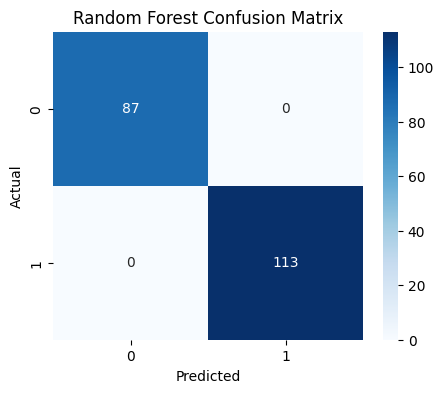

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [288]:
cm = confusion_matrix(ytest, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(classification_report(ytest, rf_pred))


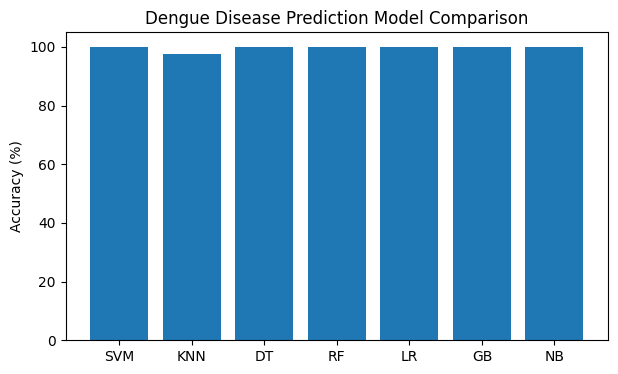

In [289]:
models = ['SVM','KNN','DT','RF','LR','GB','NB']
accuracy = [
    accuracy_score(ytest, svm_pred)*100,
    accuracy_score(ytest, knn_pred)*100,
    accuracy_score(ytest, dt_pred)*100,
    accuracy_score(ytest, rf_pred)*100,
    accuracy_score(ytest, lr_pred)*100,
    accuracy_score(ytest, gb_pred)*100,
    accuracy_score(ytest, nb_pred)*100
]

plt.figure(figsize=(7,4))
plt.bar(models, accuracy)
plt.ylabel("Accuracy (%)")
plt.title("Dengue Disease Prediction Model Comparison")
plt.show()


In [290]:
import pickle

pickle.dump(rf, open("Dengue_Prediction_Model.sav", "wb"))

In [291]:
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import OneHotEncoder
# Use drop='first' to get 39 categorical columns + 4 numeric = 43 total
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_categorical)
# Save this new encoder.sav
# Identify categorical columns from X before encoding
X_categorical = X.select_dtypes(include=['object'])

encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded_ohe = encoder.fit_transform(X_categorical)

pickle.dump(encoder, open("encoder.sav", "wb"))